### The objective is to obtain a data-driven solution that will allow us to reduce churn rates and, as a consequence, to increase customer satisfaction and corporation revenue.
### 1. Import the data: [ Score: 3 point ]

- Import the required libraries
- Create a database in MYSQL server using MYSQL workbench and Import the datasets 'TelcomCustomerChurn1' and 'TelcomCustomerChurn2' in it.
- Connect to DB using mysql-connector-python package
- Import all the given datasets from MYSQL server. Explore shape and size. 
- Merge all datasets onto one and explore final shape and size.

In [1]:
# importing sql libraries
import pymysql
import pymysql.cursors
import mysql.connector
from mysql.connector import Error
import pandas as pd

In [2]:
import mysql.connector as my_con
MYSQL_Connection = my_con.connect(user ='root',
            password= 'arnab@123', ##Give your password
            host= 'localhost',
            database= 'Telecom')

print(MYSQL_Connection)

In [3]:
!pip install PyMySQL

In [4]:
import pymysql.cursors
import pymysql

# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='arnab@123',
                             database='Telecom')

In [5]:
connection

In [6]:
# Import data from MY SQL server
df_1 = pd.read_sql('Select * from telecom.`telcomcustomer-churn_1`', con=MYSQL_Connection)
df_2 = pd.read_sql('Select * from telecom.`telcomcustomer-churn_2`', con=MYSQL_Connection)

In [7]:
# exploring shape & size of the dataframes
print(df_1.shape,df_1.size)
print(df_2.shape,df_2.size)

(7043, 10) 70430
(7043, 12) 84516


In [8]:
import itertools as iter
import io
import plotly.offline as py #visualisation
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from PIL import Image
import plotly.tools as tls
import plotly.figure_factory as ff
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
df1=pd.read_csv('TelcomCustomer-Churn_1.csv')
df2=pd.read_csv('TelcomCustomer-Churn_2.csv')
print("Data 1:",df1.shape)
print("\nData 2:",df2.shape)

Data 1: (7043, 10)

Data 2: (7043, 12)


In [10]:
df_Original = pd.concat([df1, df2], axis=1, sort=False) 
df = df_Original.copy(deep=True) # Backup the original data

In [11]:
df.shape

(7043, 22)

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'customerID',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [14]:
dfc = df.copy()

#### 2. Data cleansing and Exploratory Data Analysis: [ Score: 8 point ]

- Data Cleansing:
  - Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.
  - Check if there are any duplicate records in the dataset? If any drop them.
  - Drop the columns which you think redundant for the analysis.
  - Encode the categorical variables.
  - Write all the above steps in functions for modularity.

- Exploratory Data Analysis:
   - Perform detailed statistical analysis on the data.
   - Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [15]:
print("The missing value of each columns of the dataframe\n",(df.isnull().values.sum()))

The missing value of each columns of the dataframe
 0


In [16]:
def missing_values(df):
    print("Missing data of dataframe in percentage\n",df.isnull().sum()/len(df)*100)
    
missing_values(df) 

Missing data of dataframe in percentage
 customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
customerID          0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

dfc.select_dtypes(include=np.number).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [18]:
## Let us check the statistical summary of the categorical variables
dfc.select_dtypes(include='O').describe().transpose()

,count,unique,top,freq
customerID,7043,7043,9057-SIHCH,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
customerID,7043,7043,9057-SIHCH,1
OnlineBackup,7043,3,No,3088


Average Tenure is 32.37 months

Average Monthly charges are 64.76

Maximum Monthly charges is 118.75 while minimum is 18.25
Senior citizen is actually categorical hence the 25%-50%-75% distribution is not proper

We can also conclude that 75% of people have tenure.

Average Monthly charges are USD 64.76 whereas 25% of customers pay more than USD 89.85 per month

Mostly Electronic check is used as payment method

Mostly didnt churn

Most customers go for month-to-month contract

In [19]:
dfc.TotalCharges = pd.to_numeric(dfc.TotalCharges, errors='coerce')
dfc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
customerID           0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see there are 11 missing values in TotalCharges column. Let's check these records

In [20]:
dfc.loc[dfc ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [21]:
#Removing missing values 
dfc.dropna(how = 'any', inplace = True)

Remove columns not required for processing

In [22]:
#drop column customerID and tenure
dfc.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
dfc.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
# summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  customerID        7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


some payment method denominations contain in parenthesis the word automatic. These denominations are too long to be used as tick labels in further visualizations. Therefore, we remove this clarification in parenthesis from the entries of the PaymentMethod column.

In [24]:
# unique elements of the PaymentMethod column
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [25]:
# remove (automatic) from payment method names
df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '', regex=False)

In [26]:
# unique elements of the PaymentMethod column after the modification 
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer ',
       'Credit card '], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Replace all categorical attributes into dummy variables

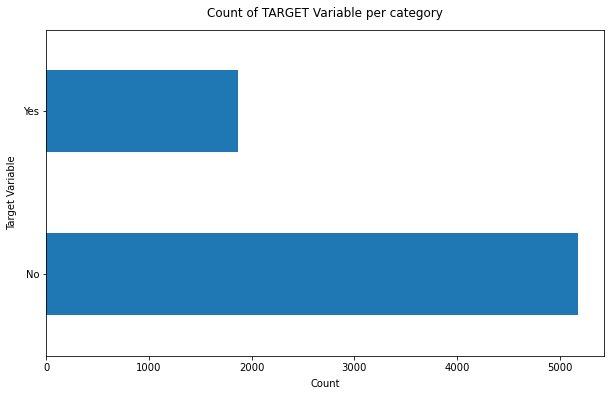

In [28]:
df['Churn'].value_counts().plot(kind='barh', figsize=(10, 6))
plt.xlabel("Count", labelpad=6)
plt.ylabel("Target Variable", labelpad=6)
plt.title("Count of TARGET Variable per category", y=1.02);

 Establishing a correlation between the attributes in the dataset with the churn attribute

In [29]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

*Data is highly imbalanced, ratio = 73:27,
So we analyse the data with other features while taking the target values separately to get some insights.*

### distibution of individual predictors by churn

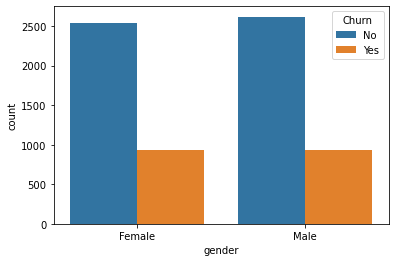

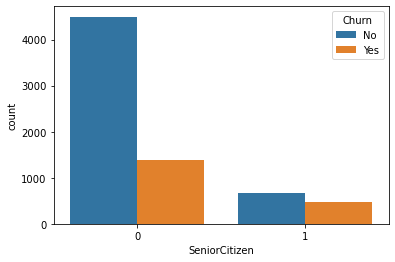

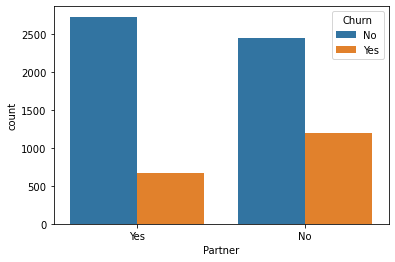

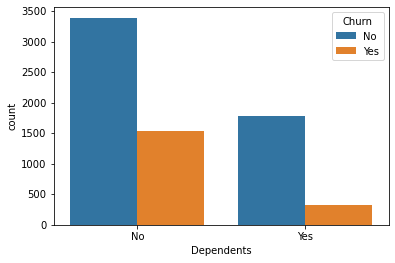

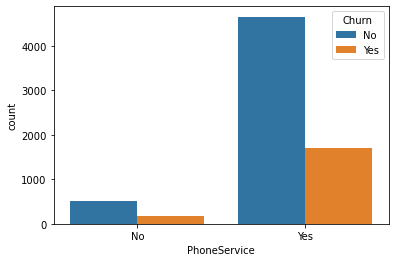

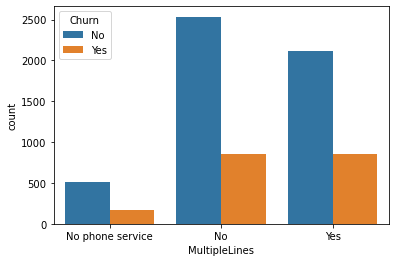

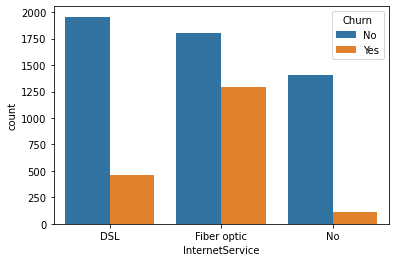

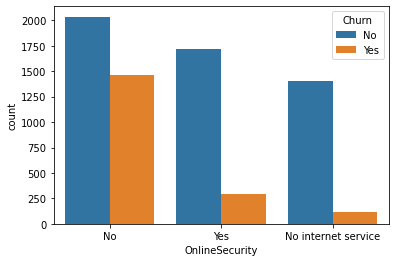

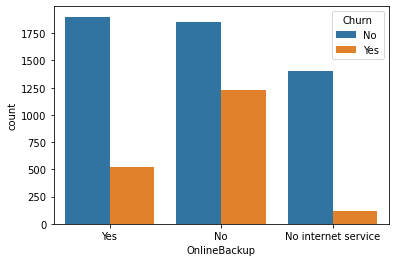

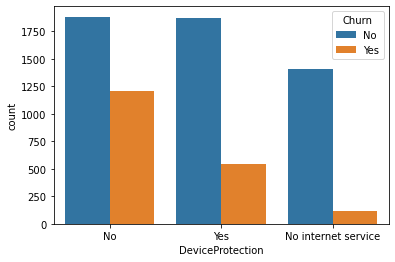

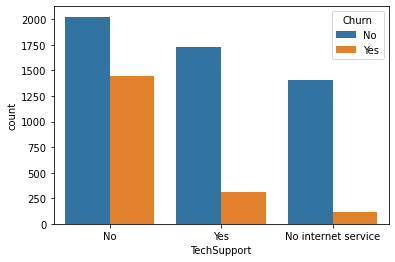

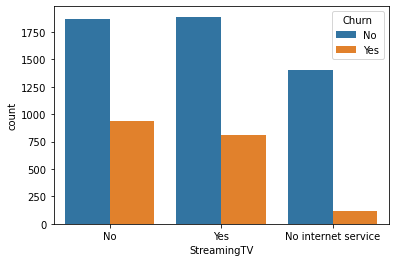

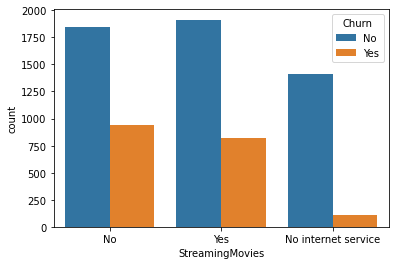

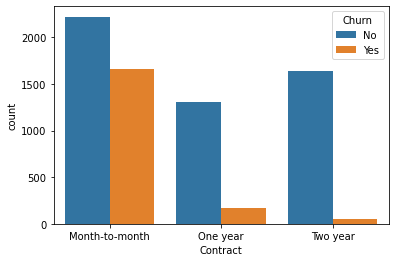

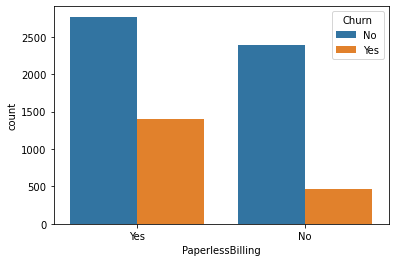

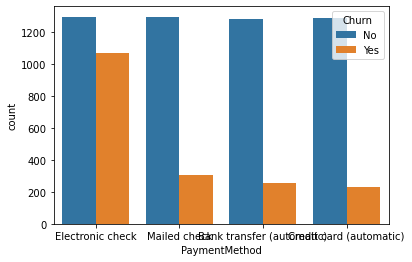

In [30]:
for i, predictor in enumerate(dfc.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=dfc, x=predictor, hue='Churn')

Converting the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [31]:
dfc['Churn'] = np.where(dfc.Churn == 'Yes',1,0)

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Now Convert all the categorical variables into dummy variables

In [33]:
dfcdummies = pd.get_dummies(dfc)
dfcdummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


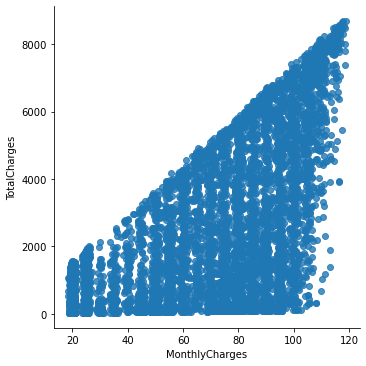

In [34]:
sns.lmplot(data=dfcdummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

### Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

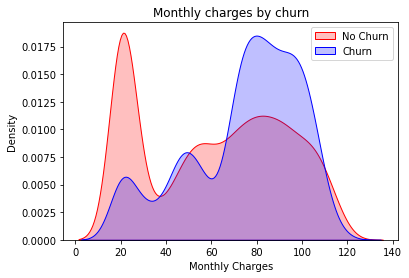

In [35]:
Mth = sns.kdeplot(dfcdummies.MonthlyCharges[(dfcdummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(dfcdummies.MonthlyCharges[(dfcdummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

*Churn is high when Monthly Charges are high*

Text(0.5, 1.0, 'Total charges by churn')

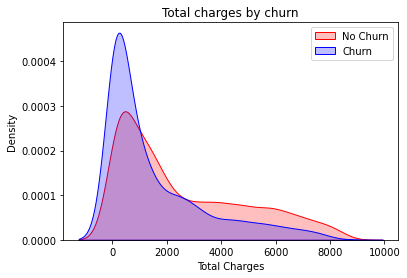

In [36]:
Tot = sns.kdeplot(dfcdummies.TotalCharges[(dfcdummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(dfcdummies.TotalCharges[(dfcdummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

***Surprising insight** as higher Churn at lower Total Charges*

*However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.*

 #### Build a corelation of all predictors with 'Churn'

In [37]:
dfcdummies.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Femal

<AxesSubplot:>

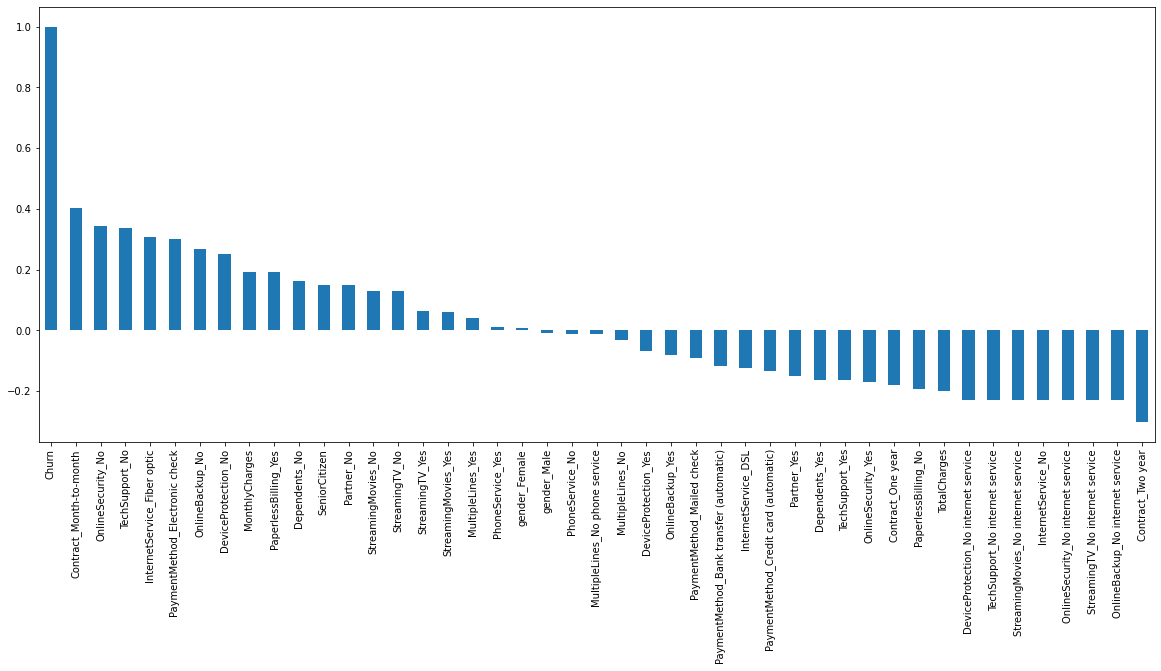

In [38]:
plt.figure(figsize=(20,8))
dfcdummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fiber Optics Internet

LOW Churn is seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of Phone Service and # of multiple lines have almost NO impact on Churn

This is also evident from the Heatmap below

<AxesSubplot:>

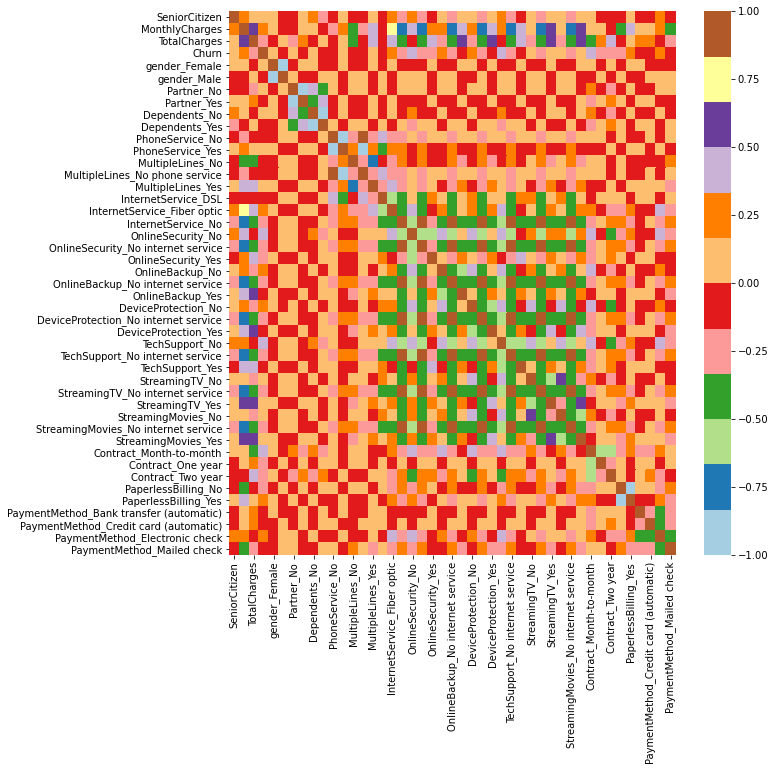

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcdummies.corr(), cmap="Paired")

### Bivariate Analysis

In [40]:
new_df1_target0=dfc.loc[dfc["Churn"]==0]
new_df1_target1=dfc.loc[dfc["Churn"]==1]

In [41]:
def uniplot(dfc,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(dfc[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

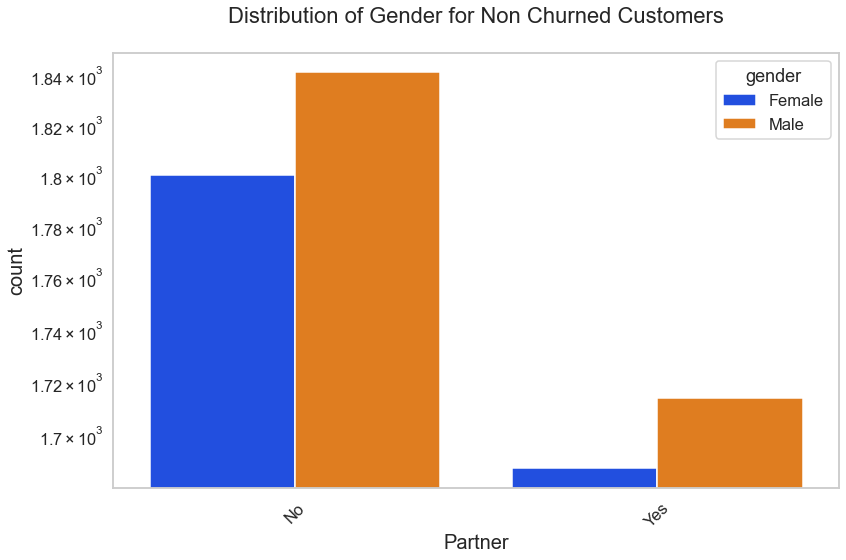

In [42]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

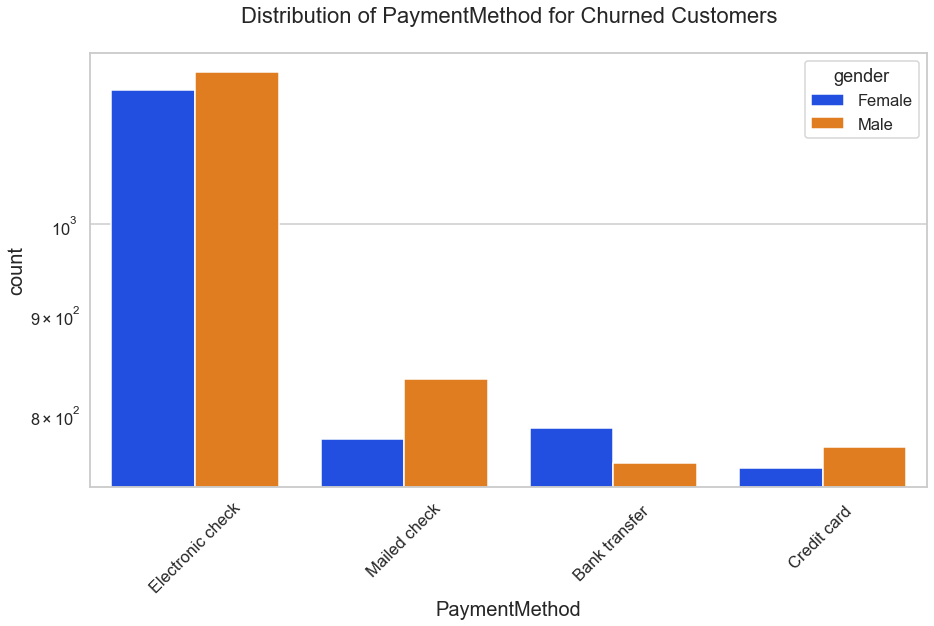

In [43]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

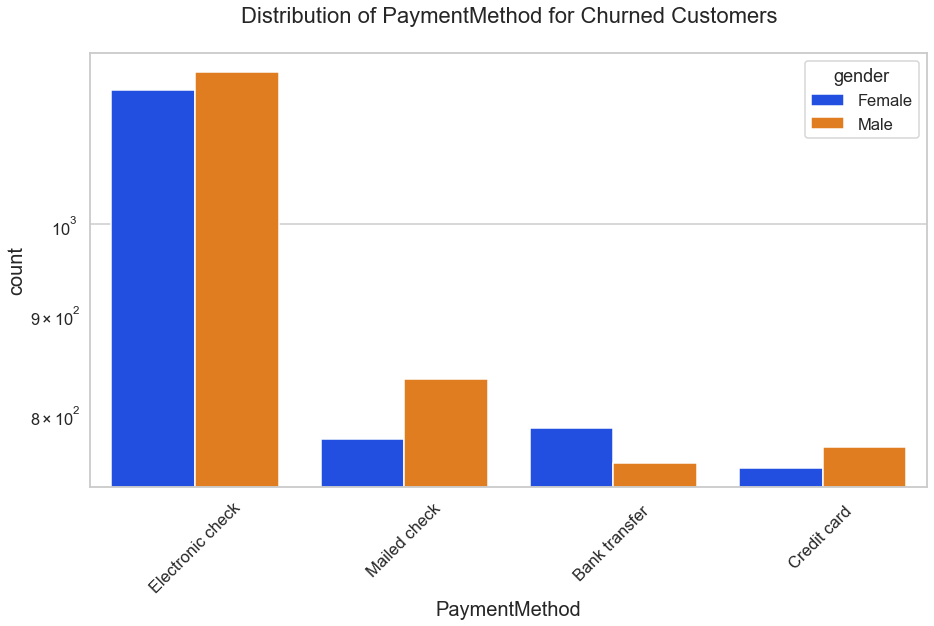

In [44]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

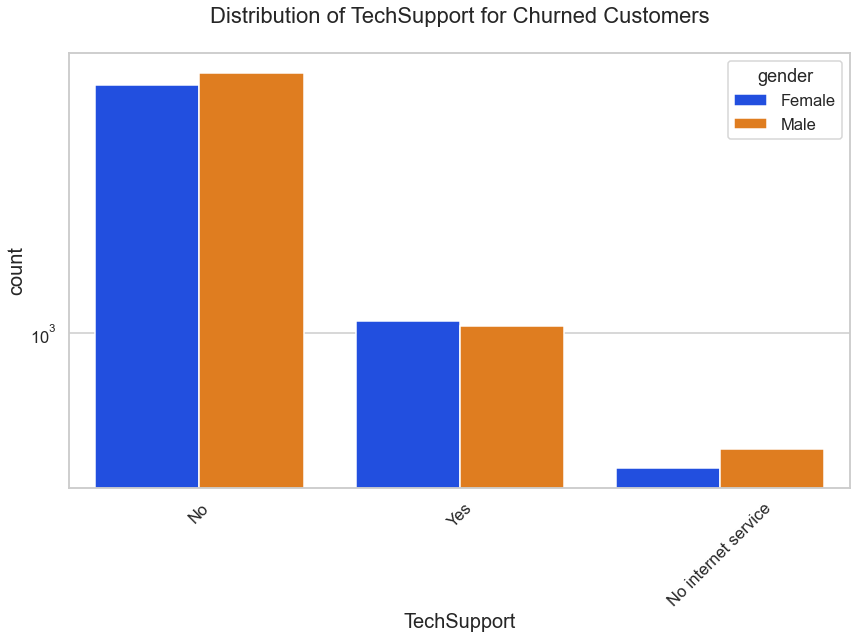

In [45]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

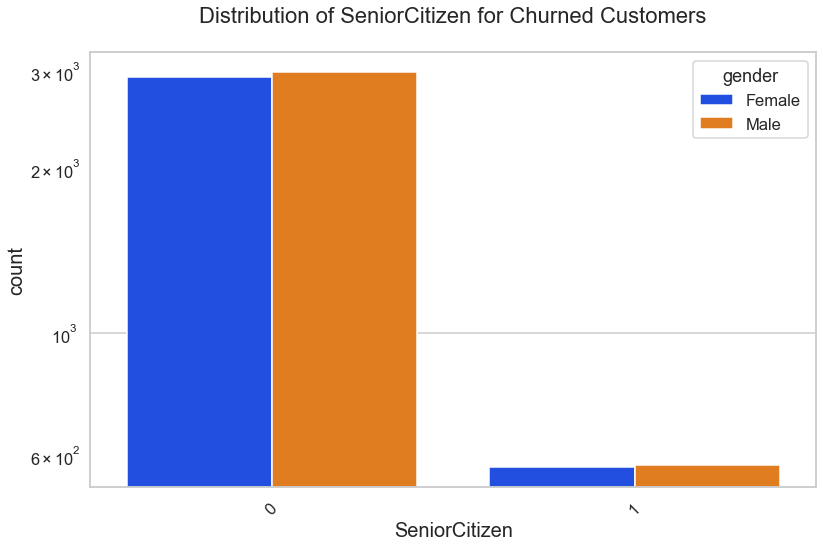

In [46]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

These are some of the quick insights from this exercise:

-Electronic check medium are the highest churners

-Contract Type - Monthly customers are more likely to churn because of no -contract terms, as they are free to go customers.

-No Online security, No Tech Support category are high churners

-Non senior Citizens are high churners

In [47]:
## select object datatype variables
object_type_variables = [i for i in dfc.columns if dfc.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(dfc):
    for i in object_type_variables:
        q = le.fit_transform(dfc[i].astype(str))  
        dfc[i] = q                               
        dfc[i] = dfc[i].astype(int)
encoder(dfc)

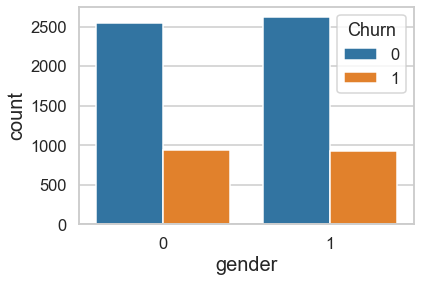

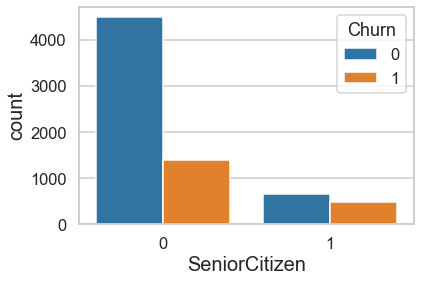

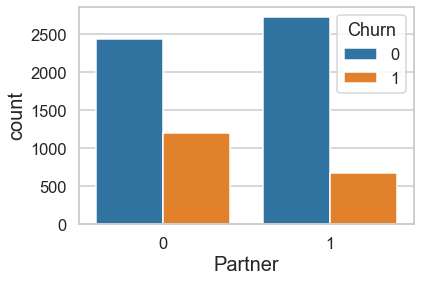

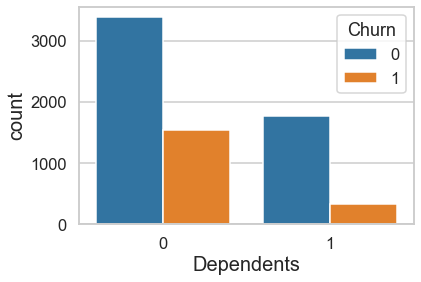

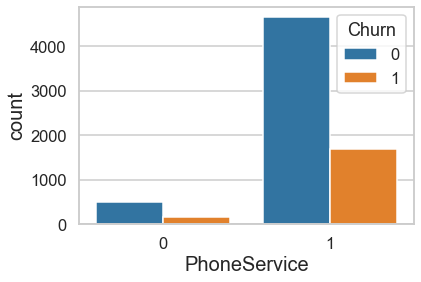

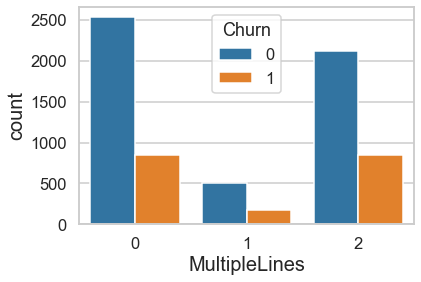

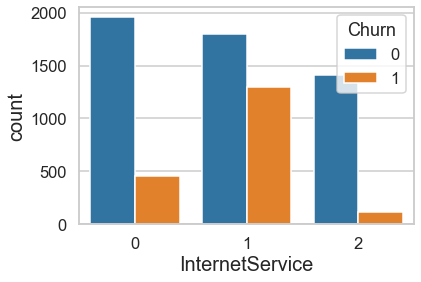

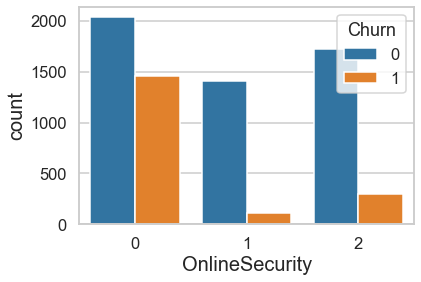

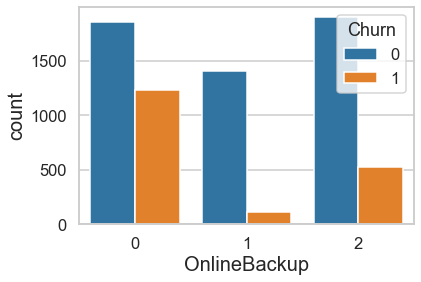

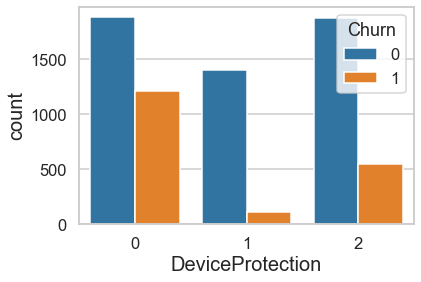

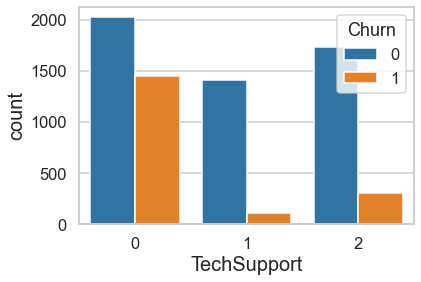

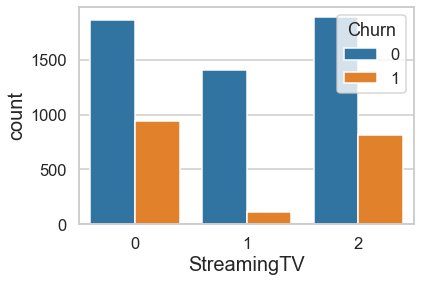

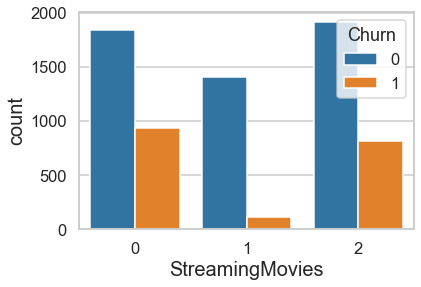

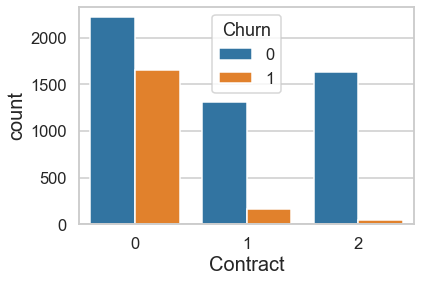

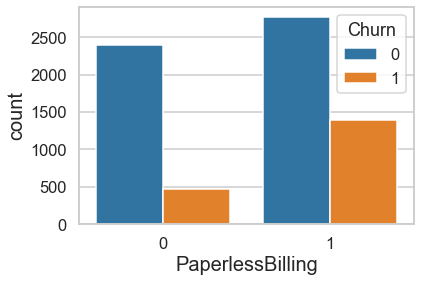

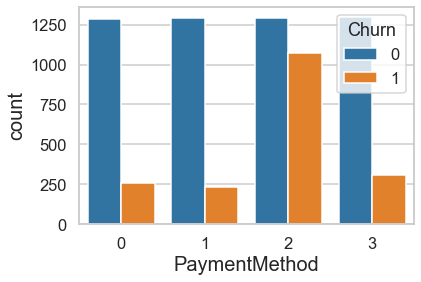

In [48]:
for i, predictor in enumerate(dfc.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=dfc, x=predictor, hue='Churn')


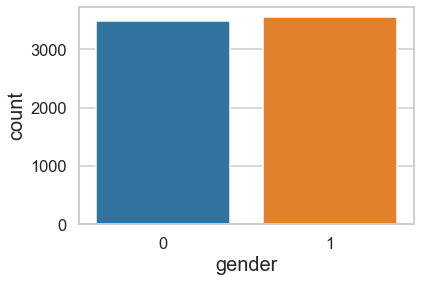

In [49]:
sns.countplot(dfc['gender'])
plt.show()

There are almost equal number of male and female customers

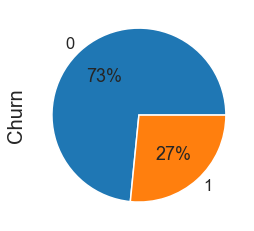

In [50]:
# Visualizing Churn proportion
dfc['Churn'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

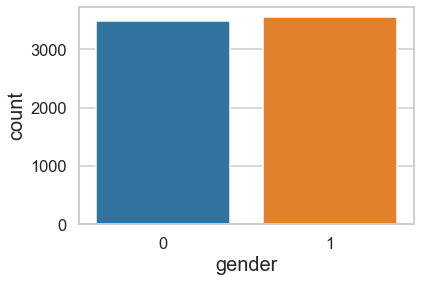

In [51]:
# Lets check the gender distribution of the customers.
sns.countplot(dfc['gender'])
plt.show()

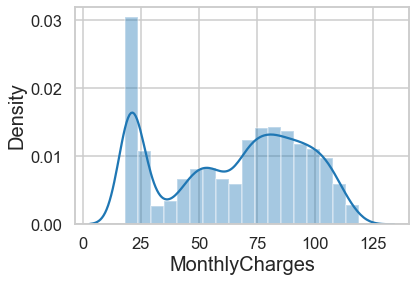

In [52]:
sns.distplot(dfc['MonthlyCharges'])
plt.show()

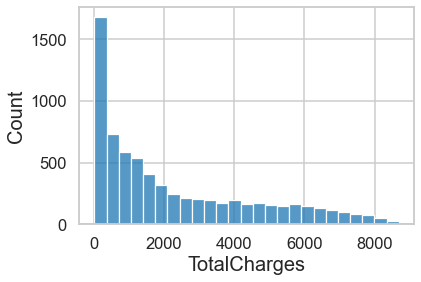

In [53]:
sns.histplot(dfc['TotalCharges'])
plt.show()

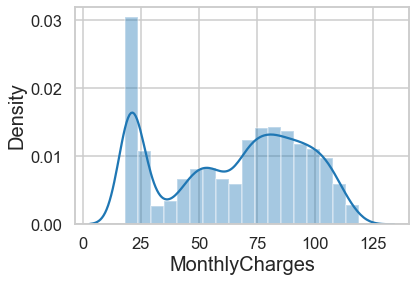

In [54]:
sns.distplot(dfc['MonthlyCharges'])
plt.show()

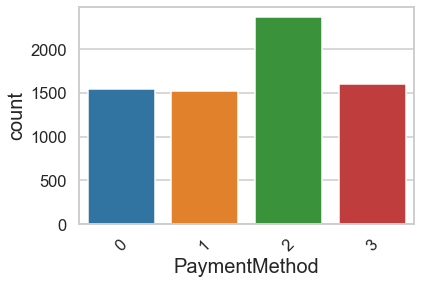

In [55]:
## lets check the distribution of the different PaymentMethod.
sns.countplot(dfc['PaymentMethod'])
plt.xticks(rotation=45)
plt.show()

Multivariate Analysis

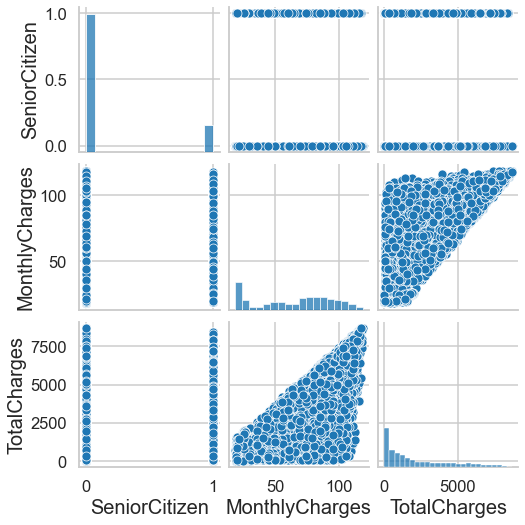

In [56]:
sns.pairplot(dfc.select_dtypes(include=[np.int64, np.float64]));

-  Total charges are increasing with tenure
- Monthly charges accumulating to increase Total Charges

### 3. Data Preparation for model building: [ Score: 2 point ]

- Store the target column (i.e.Churn) in the y variable and the rest of the columns in the X variable
- Split the dataset into two parts (i.e. 70% train and 30% test).
- Standardize the columns using the z-score scaling approach

In [57]:
Y = dfc['Churn']
X = dfc.drop(['Churn'],axis=1)  
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [58]:
sc = StandardScaler()
# fit_transform() method first trains the Scaler on dataset and then transforms it between 0 and 1
X_train = sc.fit_transform(X_train)
# transform() method only transforms the dataset based on what it has learnt on the dataset before
X_test = sc.transform(X_test)

### 4. Model training and testing: [ Score: 6 point ]

- Train and test Logistic Regression, KNN and Naive Bayes classifier models taught in the learning module.
- Display the classification accuracies for train and test data.. 
- Display and compare all the models designed with their train and test accuracies.
- Select the final best trained model along with your detailed comments for selecting this model. 

##### A) Logistic Regression

In [59]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [60]:
y_pred_LR = log_reg.predict(X_test)

In [61]:
print('accuracy:',accuracy_score(Y_test,y_pred_LR))

accuracy: 0.7928909952606635


In [62]:
print(classification_report(Y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



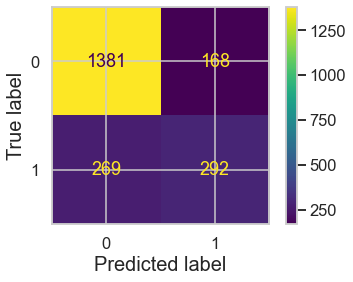

In [63]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, Y_test)  
plt.show()

##### B) Naive Bayes

In [64]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [65]:
y_pred_NB = gnb.predict(X_test)
print('accuracy:',accuracy_score(Y_test,y_pred_NB))

accuracy: 0.7464454976303317


In [66]:
print(classification_report(Y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1549
           1       0.52      0.73      0.60       561

    accuracy                           0.75      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.75      0.76      2110



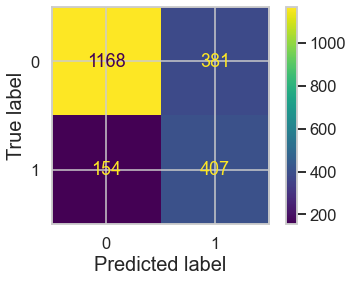

In [67]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, Y_test)  
plt.show()

##### C)KNN

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [69]:
y_pred_KNN = knn.predict(X_test)
print('accuracy:',accuracy_score(Y_test,y_pred_KNN))

accuracy: 0.7393364928909952


In [70]:
print(classification_report(Y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1549
           1       0.51      0.49      0.50       561

    accuracy                           0.74      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.74      0.74      0.74      2110



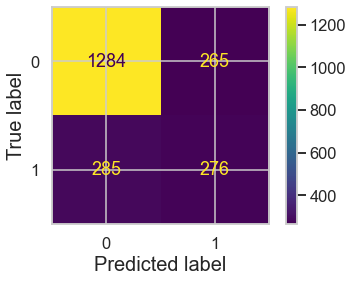

In [71]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [72]:
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

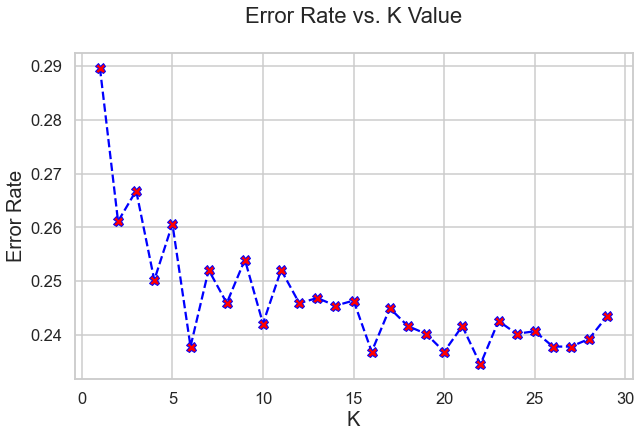

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='X',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [74]:
## Model: KNN classfier with optimal K=19
knn_two = KNeighborsClassifier(n_neighbors=19)
knn_two.fit(X_train,Y_train)

## y predicted
y_pred_knn_two = knn_two.predict(X_test)

## accuracy
print('accuracy (k=19):',accuracy_score(Y_test,y_pred_knn_two))

accuracy (k=19): 0.7597156398104266


In [75]:
print(classification_report(Y_test,y_pred_knn_two))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1549
           1       0.55      0.54      0.54       561

    accuracy                           0.76      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110



In [76]:
### Comparison of Logistic Regression, Naive bayes classifier model and KNN classfier model 
print('Logistic Regression - accuracy:',accuracy_score(Y_test,y_pred_LR))
print('Naive Bayes model - accuracy:',accuracy_score(Y_test,y_pred_NB))
print('KNN with optimal K - accuracy:',accuracy_score(Y_test,y_pred_knn_two))

Logistic Regression - accuracy: 0.7928909952606635
Naive Bayes model - accuracy: 0.7464454976303317
KNN with optimal K - accuracy: 0.7597156398104266


### 5. CONCLUSION

- These are some of the quick insights from this exercise:

- Electronic check medium are the highest churners

- Contract Type - Monthly customers are more likely to churn because of no -contract terms, as they are free to go customers.

- No Online security, No Tech Support category are high churners
- Non senior Citizens are high churners
- We have explored the variables with respect to the subcription charges for the customers and inferred that the charges were a very important variable whether the customer is going to stay or churn.
- 3 different classification models are made, the logistic regression model  gives us the best accuracy score for training and testing.
- Where as KNN model gives the good accuarcy for the training but the accuracy is decreased for testing.
- Please note, target class is imbalanced so we can further go with evaluating the models based on the different performance metrics such as presicion, recall and F1 score and choose the model accordingly.